# 경로 확인

In [1]:
getwd()

[1] "C:/Users/codnj/MyProject/데이터 마이닝 프로젝트 - 머신러닝을 활용한 상수도관 누수 감지"

In [2]:
list.files()

[1] "데이터 마이닝 프로젝트 - 머신러닝을 활용한 상수도관 누수 감지 .ipynb"
[2] "상하수도 데이터(상수관로 누수 감지)"

# 라이브러리 설치 및 불러오기

In [26]:
library(purrr)
library(dplyr)
library(caret)
library(class)
library(rpart)
library(randomForest)
library(e1071)
library(pROC)

Warning message:
"package 'e1071' was built under R version 4.3.3"

# 데이터 통합

In [13]:
file1_path<-"상하수도 데이터(상수관로 누수 감지)/Training/누수감지데이터셋(Training)"
file2_path<-"상하수도 데이터(상수관로 누수 감지)/Validation/누수감지데이터셋(Validation)"

files1<-list.files(path=file1_path, pattern="*.csv", full.names=TRUE)
files2<-list.files(path=file2_path, pattern="*.csv", full.names=TRUE)

In [14]:
#library(purrr)
merged_data<-map_dfr(c(files1, files2), read.csv)

Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into charac

In [15]:
merged_data

site,sid,ldate,lrate,llevel,leaktype,X0HZ,X10HZ,X20HZ,X30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
S-4687025030,S-0359369085120315,20200708,90,256,out,0,18,19,16,...,4690,243,4710,284,4700,324,4670,230,4710,260
S-4677025028,S-0359369083968368,20190601,90,542,out,0,4,2,4,...,310,423,300,711,270,412,270,531,290,538
S-4673025027,S-0359369085133797,20201028,90,705,out,0,0,0,3,...,240,751,240,897,240,741,240,741,240,562
S-4772025022,S-0359369084117593,20200505,90,499,out,0,2,2,2,...,370,549,360,427,370,800,370,552,370,458
S-4729010102,S-0359369084010178,20200520,90,423,out,0,3,3,3,...,400,521,400,395,400,461,400,470,400,515
S-4280025040,S-0359369085347892,20210108,90,611,out,0,5,5,7,...,300,644,300,504,300,738,300,739,300,793
S-4673025027,S-0359369085160188,20210130,90,433,out,0,17,19,19,...,4840,447,240,365,240,464,4870,380,240,486
S-4772025022,S-0359369084116777,20200429,90,479,out,0,3,5,5,...,410,630,420,439,410,533,410,455,430,508
S-4677025028,S-0359369084263017,20190521,90,234,out,0,6,5,6,...,380,186,360,289,360,243,380,210,350,269
S-4677025028,S-0359369084263017,20190321,90,307,out,0,6,6,6,...,350,272,360,319,360,432,290,414,380,276


In [ ]:
write.csv(merged_data, "merged_data.csv")

# 데이터 이해

In [2]:
data<-read.csv("merged_data.csv")

In [9]:
str(data)

'data.frame':	70384 obs. of  540 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ site    : Factor w/ 49 levels "S-2711010100",..: 34 29 28 43 42 10 28 43 29 29 ...
 $ sid     : Factor w/ 2710 levels "S-0035514005600295",..: 2048 349 2119 1727 426 2557 2272 1719 1770 1770 ...
 $ ldate   : int  20200708 20190601 20201028 20200505 20200520 20210108 20210130 20200429 20190521 20190321 ...
 $ lrate   : int  90 90 90 90 90 90 90 90 90 90 ...
 $ llevel  : int  256 542 705 499 423 611 433 479 234 307 ...
 $ leaktype: Factor w/ 5 levels "in","noise","normal",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ X0HZ    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X10HZ   : int  18 4 0 2 3 5 17 3 6 6 ...
 $ X20HZ   : int  19 2 0 2 3 5 19 5 5 6 ...
 $ X30HZ   : int  16 4 3 2 3 7 19 5 6 6 ...
 $ X40HZ   : int  20 6 3 2 3 5 17 7 7 7 ...
 $ X50HZ   : int  19 4 3 2 3 7 16 7 7 8 ...
 $ X60HZ   : int  17 6 3 2 3 7 24 9 8 8 ...
 $ X70HZ   : int  16 8 5 2 3 10 19 10 11 10 ...
 $ X80HZ   : int  20 8 14 2 5 14 24 9 10 10 ...
 $ X9

In [38]:
head(data)

X,site,sid,ldate,lrate,llevel,leaktype,X0HZ,X10HZ,X20HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
1,S-4687025030,S-0359369085120315,20200708,90,256,out,0,18,19,...,4690,243,4710,284,4700,324,4670,230,4710,260
2,S-4677025028,S-0359369083968368,20190601,90,542,out,0,4,2,...,310,423,300,711,270,412,270,531,290,538
3,S-4673025027,S-0359369085133797,20201028,90,705,out,0,0,0,...,240,751,240,897,240,741,240,741,240,562
4,S-4772025022,S-0359369084117593,20200505,90,499,out,0,2,2,...,370,549,360,427,370,800,370,552,370,458
5,S-4729010102,S-0359369084010178,20200520,90,423,out,0,3,3,...,400,521,400,395,400,461,400,470,400,515
6,S-4280025040,S-0359369085347892,20210108,90,611,out,0,5,5,...,300,644,300,504,300,738,300,739,300,793


In [26]:
summary(data)

       X                   site                       sid       
 Min.   :    1   S-4571025029:11071   S-0359369081383008:  153  
 1st Qu.:17597   S-4677025028: 7216   S-0359369084269204:  128  
 Median :35193   S-4677025033: 5070   S-0359369084047519:  113  
 Mean   :35193   S-2711010100: 4908   S-0359369084035613:  110  
 3rd Qu.:52788   S-4372025021: 4798   S-0359369084031810:  106  
 Max.   :70384   S-4784025026: 4218   S-0359369084035548:  104  
                 (Other)     :33103   (Other)           :69670  
     ldate              lrate           llevel         leaktype          X0HZ  
 Min.   :20190227   Min.   :30.00   Min.   : 112.0   in    :14932   Min.   :0  
 1st Qu.:20200425   1st Qu.:60.00   1st Qu.: 239.0   noise : 5658   1st Qu.:0  
 Median :20200802   Median :90.00   Median : 399.5   normal:22166   Median :0  
 Mean   :20200767   Mean   :75.92   Mean   : 447.2   other : 7897   Mean   :0  
 3rd Qu.:20201206   3rd Qu.:90.00   3rd Qu.: 615.0   out   :19731   3rd Qu.:0  


In [29]:
dim(data)

[1] 70384   540

# 데이터 전처리

### 결측치 확인

In [5]:
sum(is.na(data))

[1] 0

### 독립 변수, 종속 변수 분리

In [3]:
x<-data%>%subset(select=-leaktype)
y<-data[,"leaktype"]

### 모델링에 필요 없는 변수 삭제

In [4]:
x<-x%>%subset(select=-c(X, site, sid, ldate))

### o에 가까운 분산을 갖는 변수 삭제 

In [5]:
drop_cols<-names(x[, sapply(x, var)<0.1, drop=FALSE])
drop_cols
x<-x%>%select(-one_of(drop_cols))

[1] "X0HZ"

### 변수 선택 - 상관관계 분석 - Pearson 순위 상관 계수 분석
###### 상관 계수가 주어진 기준을 초과하는 모든 변수 제거

In [6]:
cor_time<-system.time({
  spearman_cor <- findCorrelation(cor(x), cutoff = 0.8, names = T)
  
})
spearman_cor

[1] "X70HZ"   "X80HZ"   "X170HZ"  "X220HZ"  "X380HZ"  "X400HZ"  "X430HZ" 
  [8] "X440HZ"  "X460HZ"  "X470HZ"  "X490HZ"  "X500HZ"  "X510HZ"  "X520HZ" 
 [15] "X550HZ"  "X560HZ"  "X570HZ"  "X580HZ"  "X590HZ"  "X610HZ"  "X620HZ" 
 [22] "X630HZ"  "X640HZ"  "X650HZ"  "X670HZ"  "X770HZ"  "X780HZ"  "X790HZ" 
 [29] "X800HZ"  "X810HZ"  "X830HZ"  "X840HZ"  "X850HZ"  "X860HZ"  "X870HZ" 
 [36] "X880HZ"  "X890HZ"  "X900HZ"  "X910HZ"  "X920HZ"  "X930HZ"  "X970HZ" 
 [43] "X980HZ"  "X990HZ"  "X1000HZ" "X1010HZ" "X1050HZ" "X1060HZ" "X1070HZ"
 [50] "X1100HZ" "X1110HZ" "X1120HZ" "X1130HZ" "X1140HZ" "X1150HZ" "X1160HZ"
 [57] "X1190HZ" "X1210HZ" "X1220HZ" "X1250HZ" "X1260HZ" "X1270HZ" "X1280HZ"
 [64] "X1290HZ" "X1300HZ" "X1310HZ" "X1320HZ" "X1330HZ" "X1340HZ" "X1350HZ"
 [71] "X1360HZ" "X1370HZ" "X1380HZ" "X1390HZ" "X1400HZ" "X1410HZ" "X1420HZ"
 [78] "X1430HZ" "X1440HZ" "X1450HZ" "X1460HZ" "X1470HZ" "X1480HZ" "X1490HZ"
 [85] "X1500HZ" "X1510HZ" "X1520HZ" "X1530HZ" "X1540HZ" "X1550HZ" "X1560HZ"
 [92] "X1570HZ" "X1580HZ" "X1590HZ" "X1610HZ" "X1630HZ" "X1640HZ" "X1650HZ"
 [99] "X1660HZ" "X1670HZ" "X1700HZ" "X1710HZ" "X1720HZ" "X1730HZ" "X1740HZ"
[106] "X1750HZ" "X1760HZ" "X1770HZ" "X1780HZ" "X1790HZ" "X1810HZ" "X1820HZ"
[113] "X1830HZ" "X1840HZ" "X1850HZ" "X1860HZ" "X1870HZ" "X1900HZ" "X1910HZ"
[120] "X1920HZ" "X1930HZ" "X1940HZ" "X1950HZ" "X1960HZ" "X1970HZ" "X2050HZ"
[127] "X2060HZ" "X2070HZ" "X2080HZ" "X2090HZ" "X2100HZ" "X2110HZ" "X2120HZ"
[134] "X2130HZ" "X2140HZ" "X2150HZ" "X2160HZ" "X2170HZ" "X2180HZ" "X2190HZ"
[141] "X2200HZ" "X2210HZ" "X2220HZ" "X2230HZ" "X2250HZ" "X2260HZ" "X2270HZ"
[148] "X2280HZ" "X2290HZ" "X2300HZ" "X2310HZ" "X2320HZ" "X2330HZ" "X2340HZ"
[155] "X2350HZ" "X2360HZ" "X2440HZ" "X2450HZ" "X2460HZ" "X2470HZ" "X2480HZ"
[162] "X2490HZ" "X2500HZ" "X2510HZ" "X2520HZ" "X2530HZ" "X2540HZ" "X2550HZ"
[169] "X2560HZ" "X2570HZ" "X2610HZ" "X2620HZ" "X2630HZ" "X2640HZ" "X2650HZ"
[176] "X2660HZ" "X2670HZ" "X2680HZ" "X2690HZ" "X2700HZ" "X2710HZ" "X2720HZ"
[183] "X2730HZ" "X2740HZ" "X2750HZ" "X2760HZ" "X2770HZ" "X2780HZ" "X2790HZ"
[190] "X2810HZ" "X2820HZ" "X2830HZ" "X2840HZ" "X2850HZ" "X2880HZ" "X2950HZ"
[197] "X2970HZ" "X2980HZ" "X3000HZ" "X3010HZ" "X3020HZ" "X3050HZ" "X3060HZ"
[204] "X3070HZ" "X3080HZ" "X3090HZ" "X3100HZ" "X3110HZ" "X3120HZ" "X3130HZ"
[211] "X3140HZ" "X3150HZ" "X3160HZ" "X3170HZ" "X3210HZ" "X3220HZ" "X3280HZ"
[218] "X3290HZ" "X3300HZ" "X3310HZ" "X3320HZ" "X3330HZ" "X3340HZ" "X3360HZ"
[225] "X3370HZ" "X3380HZ" "X3390HZ" "X3450HZ" "X3460HZ" "X3470HZ" "X3480HZ"
[232] "X3490HZ" "X3500HZ" "X3510HZ" "X3520HZ" "X3530HZ" "X3570HZ" "X3580HZ"
[239] "X3590HZ" "X3600HZ" "X3610HZ" "X3620HZ" "X3630HZ" "X3650HZ" "X3660HZ"
[246] "X3670HZ" "X3680HZ" "X3690HZ" "X3700HZ" "X3710HZ" "X3720HZ" "X3730HZ"
[253] "X3740HZ" "X3780HZ" "X3790HZ" "X3800HZ" "X3810HZ" "X3830HZ" "X3840HZ"
[260] "X3850HZ" "X3870HZ" "X3890HZ" "X3900HZ" "X3910HZ" "X3920HZ" "X3930HZ"
[267] "X3950HZ" "X3960HZ" "X3970HZ" "X3980HZ" "X3990HZ" "X4000HZ" "X4010HZ"
[274] "X4020HZ" "X4030HZ" "X4040HZ" "X4050HZ" "X4070HZ" "X4120HZ" "X4130HZ"
[281] "X4140HZ" "X4150HZ" "X4160HZ" "X4170HZ" "X4180HZ" "X4190HZ" "X4200HZ"
[288] "X4210HZ" "X4230HZ" "X4240HZ" "X4250HZ" "X4260HZ" "X4270HZ" "X4280HZ"
[295] "X4290HZ" "X4300HZ" "X4360HZ" "X4400HZ" "X4410HZ" "X4420HZ" "X4430HZ"
[302] "X4440HZ" "X4450HZ" "X4460HZ" "X4470HZ" "X4480HZ" "X4490HZ" "X4500HZ"
[309] "X4510HZ" "X4520HZ" "X4530HZ" "X4540HZ" "X4550HZ" "X4560HZ" "X4570HZ"
[316] "X4580HZ" "X4590HZ" "X4640HZ" "X4660HZ" "X4670HZ" "X4680HZ" "X4690HZ"
[323] "X4700HZ" "X4710HZ" "X4720HZ" "X4750HZ" "X4760HZ" "X4770HZ" "X4780HZ"
[330] "X4790HZ" "X4800HZ" "X4810HZ" "X4820HZ" "X4830HZ" "X4850HZ" "X4870HZ"
[337] "X4880HZ" "X4890HZ" "X4900HZ" "X4910HZ" "X4920HZ" "X4930HZ" "X4940HZ"
[344] "X4950HZ" "X4960HZ" "X4970HZ" "X4980HZ" "X4990HZ" "X5000HZ" "X5010HZ"
[351] "X5020HZ" "X5030HZ" "X5040HZ" "X5050HZ" "X5060HZ" "X5070HZ" "X5080HZ"
[358] "X5090HZ" "X5100HZ" "X5110HZ" "X5120HZ" "MAX4"    "MAX9"    "MAX17"  
[365] "X10HZ"   "X20HZ"   "X30HZ"   "X40HZ"   "X90

In [7]:
x<-x%>%select(-one_of(spearman_cor))
x

lrate,X50HZ,X60HZ,X100HZ,X110HZ,X120HZ,X130HZ,X140HZ,X160HZ,X180HZ,...,MAX7,MAX8,MAX10,MAX11,MAX12,MAX14,MAX15,MAX16,MAX18,MAX19
90,19,17,16,16,16,17,17,17,17,...,233,4720,4690,243,4710,4700,324,4670,4710,260
90,4,6,18,30,90,44,30,20,36,...,627,300,310,423,300,270,412,270,290,538
90,3,3,11,25,27,85,60,27,33,...,594,240,240,751,240,240,741,240,240,562
90,2,2,4,8,16,14,28,12,6,...,503,370,370,549,360,370,800,370,370,458
90,3,3,18,14,13,10,6,5,11,...,321,420,400,521,400,400,461,400,400,515
90,7,7,39,63,92,166,198,51,17,...,535,300,300,644,300,300,738,300,300,793
90,16,24,24,25,24,28,30,30,46,...,458,4880,4840,447,240,240,464,4870,240,486
90,7,9,9,9,9,9,17,22,21,...,415,420,410,630,420,410,533,410,430,508
90,7,8,12,18,31,120,171,71,64,...,223,360,380,186,360,360,243,380,350,269
90,8,8,13,19,31,78,104,47,66,...,249,380,350,272,360,360,432,290,380,276


### 변수 확인

In [8]:
colnames(x)

[1] "lrate"   "X50HZ"   "X60HZ"   "X100HZ"  "X110HZ"  "X120HZ"  "X130HZ" 
 [8] "X140HZ"  "X160HZ"  "X180HZ"  "X210HZ"  "X230HZ"  "X240HZ"  "X250HZ" 
[15] "X260HZ"  "X270HZ"  "X280HZ"  "X290HZ"  "X300HZ"  "X310HZ"  "X320HZ" 
[22] "X330HZ"  "X340HZ"  "X350HZ"  "X360HZ"  "X370HZ"  "X390HZ"  "X420HZ" 
[29] "X450HZ"  "X480HZ"  "X530HZ"  "X540HZ"  "X600HZ"  "X660HZ"  "X710HZ" 
[36] "X720HZ"  "X760HZ"  "X820HZ"  "X960HZ"  "X1040HZ" "X1080HZ" "X1090HZ"
[43] "X1200HZ" "X1240HZ" "X1620HZ" "X1690HZ" "X1800HZ" "X1890HZ" "X2040HZ"
[50] "X2240HZ" "X2430HZ" "X2600HZ" "X2800HZ" "X2870HZ" "X2890HZ" "X2900HZ"
[57] "X2910HZ" "X2920HZ" "X2930HZ" "X2940HZ" "X2960HZ" "X2990HZ" "X3040HZ"
[64] "X3270HZ" "X3350HZ" "X3440HZ" "X3560HZ" "X3640HZ" "X3770HZ" "X4110HZ"
[71] "X4220HZ" "X4390HZ" "X4650HZ" "X4740HZ" "X4860HZ" "MAX0"    "MAX1"   
[78] "MAX2"    "MAX3"    "MAX5"    "MAX6"    "MAX7"    "MAX8"    "MAX10"  
[85] "MAX11"   "MAX12"   "MAX14"   "MAX15"   "MAX16"   "MAX18"   "MAX19"

### 표준화

In [10]:
standardlize<-function(x){return (x-mean(x))/sd(x)}
x<-as.data.frame(sapply(x, standardlize))
x

lrate,X50HZ,X60HZ,X100HZ,X110HZ,X120HZ,X130HZ,X140HZ,X160HZ,X180HZ,...,MAX7,MAX8,MAX10,MAX11,MAX12,MAX14,MAX15,MAX16,MAX18,MAX19
14.07607,12.2357922,5.8649835,6.2670067,3.7731445,-2.3894493,2.7531825,1.829038,0.7724341,-3.2571749,...,-182.0179018,4212.70928,4181.79743,-170.34066,4205.41927,4194.0002,-88.6969482,4158.92746,4200.50722,-150.90737
14.07607,-2.7642078,-5.1350165,8.2670067,17.7731445,71.6105507,29.7531825,14.829038,3.7724341,15.7428251,...,211.9820982,-207.29072,-198.20257,9.65934,-204.58073,-235.9998,-0.6969482,-241.07254,-219.49278,127.09263
14.07607,-3.7642078,-8.1350165,1.2670067,12.7731445,8.6105507,70.7531825,44.829038,10.7724341,12.7428251,...,178.9820982,-267.29072,-268.20257,337.65934,-264.58073,-265.9998,328.3030518,-271.07254,-269.49278,151.09263
14.07607,-4.7642078,-9.1350165,-5.7329933,-4.2268555,-2.3894493,-0.2468175,12.829038,-4.2275659,-14.2571749,...,87.9820982,-137.29072,-138.20257,135.65934,-144.58073,-135.9998,387.3030518,-141.07254,-139.49278,47.09263
14.07607,-3.7642078,-8.1350165,8.2670067,1.7731445,-5.3894493,-4.2468175,-9.170962,-11.2275659,-9.2571749,...,-94.0179018,-87.29072,-108.20257,107.65934,-104.58073,-105.9998,48.3030518,-111.07254,-109.49278,104.09263
14.07607,0.2357922,-4.1350165,29.2670067,50.7731445,73.6105507,151.7531825,182.829038,34.7724341,-3.2571749,...,119.9820982,-207.29072,-208.20257,230.65934,-204.58073,-205.9998,325.3030518,-211.07254,-209.49278,382.09263
14.07607,9.2357922,12.8649835,14.2670067,12.7731445,5.6105507,13.7531825,14.829038,13.7724341,25.7428251,...,42.9820982,4372.70928,4331.79743,33.65934,-264.58073,-265.9998,51.3030518,4358.92746,-269.49278,75.09263
14.07607,0.2357922,-2.1350165,-0.7329933,-3.2268555,-9.3894493,-5.2468175,1.829038,5.7724341,0.7428251,...,-0.0179018,-87.29072,-98.20257,216.65934,-84.58073,-95.9998,120.3030518,-101.07254,-79.49278,97.09263
14.07607,0.2357922,-3.1350165,2.2670067,5.7731445,12.6105507,105.7531825,155.829038,54.7724341,43.7428251,...,-192.0179018,-147.29072,-128.20257,-227.34066,-144.58073,-145.9998,-169.6969482,-131.07254,-159.49278,-141.90737
14.07607,1.2357922,-3.1350165,3.2670067,6.7731445,12.6105507,63.7531825,88.829038,30.7724341,45.7428251,...,-166.0179018,-127.29072,-158.20257,-141.34066,-144.58073,-145.9998,19.3030518,-221.07254,-129.49278,-134.90737


### 레이블 인코딩

In [15]:
y<-as.factor(as.numeric(y)-1)

### 데이터 통합

In [16]:
df<-cbind(x,y)
df

lrate,X50HZ,X60HZ,X100HZ,X110HZ,X120HZ,X130HZ,X140HZ,X160HZ,X180HZ,...,MAX8,MAX10,MAX11,MAX12,MAX14,MAX15,MAX16,MAX18,MAX19,y
14.07607,12.2357922,5.8649835,6.2670067,3.7731445,-2.3894493,2.7531825,1.829038,0.7724341,-3.2571749,...,4212.70928,4181.79743,-170.34066,4205.41927,4194.0002,-88.6969482,4158.92746,4200.50722,-150.90737,4
14.07607,-2.7642078,-5.1350165,8.2670067,17.7731445,71.6105507,29.7531825,14.829038,3.7724341,15.7428251,...,-207.29072,-198.20257,9.65934,-204.58073,-235.9998,-0.6969482,-241.07254,-219.49278,127.09263,4
14.07607,-3.7642078,-8.1350165,1.2670067,12.7731445,8.6105507,70.7531825,44.829038,10.7724341,12.7428251,...,-267.29072,-268.20257,337.65934,-264.58073,-265.9998,328.3030518,-271.07254,-269.49278,151.09263,4
14.07607,-4.7642078,-9.1350165,-5.7329933,-4.2268555,-2.3894493,-0.2468175,12.829038,-4.2275659,-14.2571749,...,-137.29072,-138.20257,135.65934,-144.58073,-135.9998,387.3030518,-141.07254,-139.49278,47.09263,4
14.07607,-3.7642078,-8.1350165,8.2670067,1.7731445,-5.3894493,-4.2468175,-9.170962,-11.2275659,-9.2571749,...,-87.29072,-108.20257,107.65934,-104.58073,-105.9998,48.3030518,-111.07254,-109.49278,104.09263,4
14.07607,0.2357922,-4.1350165,29.2670067,50.7731445,73.6105507,151.7531825,182.829038,34.7724341,-3.2571749,...,-207.29072,-208.20257,230.65934,-204.58073,-205.9998,325.3030518,-211.07254,-209.49278,382.09263,4
14.07607,9.2357922,12.8649835,14.2670067,12.7731445,5.6105507,13.7531825,14.829038,13.7724341,25.7428251,...,4372.70928,4331.79743,33.65934,-264.58073,-265.9998,51.3030518,4358.92746,-269.49278,75.09263,4
14.07607,0.2357922,-2.1350165,-0.7329933,-3.2268555,-9.3894493,-5.2468175,1.829038,5.7724341,0.7428251,...,-87.29072,-98.20257,216.65934,-84.58073,-95.9998,120.3030518,-101.07254,-79.49278,97.09263,4
14.07607,0.2357922,-3.1350165,2.2670067,5.7731445,12.6105507,105.7531825,155.829038,54.7724341,43.7428251,...,-147.29072,-128.20257,-227.34066,-144.58073,-145.9998,-169.6969482,-131.07254,-159.49278,-141.90737,4
14.07607,1.2357922,-3.1350165,3.2670067,6.7731445,12.6105507,63.7531825,88.829038,30.7724341,45.7428251,...,-127.29072,-158.20257,-141.34066,-144.58073,-145.9998,19.3030518,-221.07254,-129.49278,-134.90737,4


In [17]:
dim(df)

[1] 70384    92

### 학습/검증 데이터 분리

In [18]:
#libray(caret)
set.seed(22)
index<-createDataPartition(df$y, p=0.7, list=FALSE)

train<-df[index,]
test<-df[-index,]

table(train$y)
table(test$y)

prop.table(table(train$y))
prop.table(table(test$y))


    0     1     2     3     4 
10453  3961 15517  5528 13812 


   0    1    2    3    4 
4479 1697 6649 2369 5919 


         0          1          2          3          4 
0.21215319 0.08039212 0.31493170 0.11219581 0.28032717 


         0          1          2          3          4 
0.21214418 0.08037702 0.31492445 0.11220575 0.28034860 

# 모델링

### KNN

In [24]:
#library(class)
fit_knn_time<-system.time({
  fit_knn<-knn(train[,-92], test[,-92], train$y, k = 3)
})
fit_knn_time
#fit_knn

tabs<-xtabs(~fit_knn+test$y)

#library(caret)
confusionMatrix(tabs)

   user  system elapsed 
 100.33    0.20  218.46 

Confusion Matrix and Statistics

       test$y
fit_knn    0    1    2    3    4
      0 2676  294  120  400  927
      1  283  770   32  184  310
      2  142   32 6287   60  145
      3  358  203   52 1200  413
      4 1020  398  158  525 4124

Overall Statistics
                                         
               Accuracy : 0.7132         
                 95% CI : (0.707, 0.7193)
    No Information Rate : 0.3149         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6204         
                                         
 Mcnemar's Test P-Value : 0.0001154      

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.5975  0.45374   0.9456  0.50654   0.6967
Specificity            0.8953  0.95833   0.9738  0.94526   0.8617
Pos Pred Value         0.6058  0.48765   0.9431  0.53908   0.6625
Neg Pred Value         0.8920  0.95254   0.9749  0.93811   0.8794
Prev

### Decision Tree

In [25]:
#library(rpart)
fit_rpart_time<-system.time({
  fit_rpart<-rpart(y ~ ., data=train, method="class")
})
fit_rpart_time
fit_rpart

pred_rpart<-predict(fit_rpart, newdata = test[,-92], type = "class")
tabs2<-xtabs(~pred_rpart+test$y)

#library(caret)
confusionMatrix(tabs2)

   user  system elapsed 
   6.56    0.03   17.06 

n= 49271 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 49271 33754 2 (0.21 0.08 0.31 0.11 0.28)  
  2) lrate< 4.076068 15517     0 2 (0 0 1 0 0) *
  3) lrate>=4.076068 33754 19942 4 (0.31 0.12 0 0.16 0.41) *

Confusion Matrix and Statistics

          test$y
pred_rpart    0    1    2    3    4
         0    0    0    0    0    0
         1    0    0    0    0    0
         2    0    0 6649    0    0
         3    0    0    0    0    0
         4 4479 1697    0 2369 5919

Overall Statistics
                                          
               Accuracy : 0.5953          
                 95% CI : (0.5886, 0.6019)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.429           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.0000  0.00000   1.0000   0.0000   1.0000
Specificity            1.0000  1.00000   1.0000   1.0000   0.4376
Pos Pred Value            NaN      NaN   1.0000      NaN   0.4092
Neg Pred Value         0.7879  0.91962  

### SVM

In [27]:
#library(e1071)
fit_svm_time<-system.time({
  fit_svm<-svm(y ~ ., data=train)
})
fit_svm_time
fit_svm

pred_svm<-predict(fit_svm, newdata = test[,-92])
tabs3<-xtabs(~pred_svm+test$y)

#library(caret)
confusionMatrix(tabs3)

   user  system elapsed 
 769.14    1.71 1635.77 


Call:
svm(formula = y ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  26412


Confusion Matrix and Statistics

        test$y
pred_svm    0    1    2    3    4
       0 3004  330   10  345  491
       1  183  902    0  177  188
       2    0    0 6638    0    0
       3   95   61    0 1079   96
       4 1197  404    1  768 5144

Overall Statistics
                                          
               Accuracy : 0.7942          
                 95% CI : (0.7886, 0.7996)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7243          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.6707  0.53153   0.9983  0.45547   0.8691
Specificity            0.9293  0.97178   1.0000  0.98656   0.8440
Pos Pred Value         0.7187  0.62207   1.0000  0.81067   0.6846
Neg Pred Value         0.9129  0.95957   0.9992  0.934

### Random Forest

In [19]:
#library(randomForest)
fit_rf_time<-system.time({
  fit_rf<-randomForest(y ~ ., data=train)
})
fit_rf_time
fit_rf

pred_rf<-predict(fit_rf, newdata = test[,-92])
tabs4<-xtabs(~pred_rf+test$y)

#library(caret)
confusionMatrix(tabs4)

   user  system elapsed 
 208.34    0.50  324.14 


Call:
 randomForest(formula = y ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 9

        OOB estimate of  error rate: 6.07%
Confusion matrix:
     0    1     2    3     4 class.error
0 9578  125     0   82   668  0.08370803
1  234 3265     0  113   349  0.17571320
2    0    0 15517    0     0  0.00000000
3  281  155     0 4621   471  0.16407381
4  277  135     1   99 13300  0.03706922

Confusion Matrix and Statistics

       test$y
pred_rf    0    1    2    3    4
      0 4070   80    0  116  105
      1   67 1441    0   47   47
      2    0    1 6649    0    1
      3   43   45    0 2034   38
      4  299  130    0  172 5728

Overall Statistics
                                          
               Accuracy : 0.9436          
                 95% CI : (0.9404, 0.9467)
    No Information Rate : 0.3149          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9253          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.9087  0.84915   1.0000  0.85859   0.9677
Specificity            0.9819  0.99171   0.9999  0.99328   0.9604
Pos Pred Value         0.9311  0.89950   0.9997  0.94167   0.9050
Neg Pred Value         0.9756  0.98688   1.0000  0.98232   0.

Setting levels: control = FALSE, case = TRUE
Setting direction: controls < cases
Setting levels: control = FALSE, case = TRUE
Setting direction: controls < cases
Setting levels: control = FALSE, case = TRUE
Setting direction: controls < cases
Setting levels: control = FALSE, case = TRUE
Setting direction: controls < cases
Setting levels: control = FALSE, case = TRUE
Setting direction: controls < cases


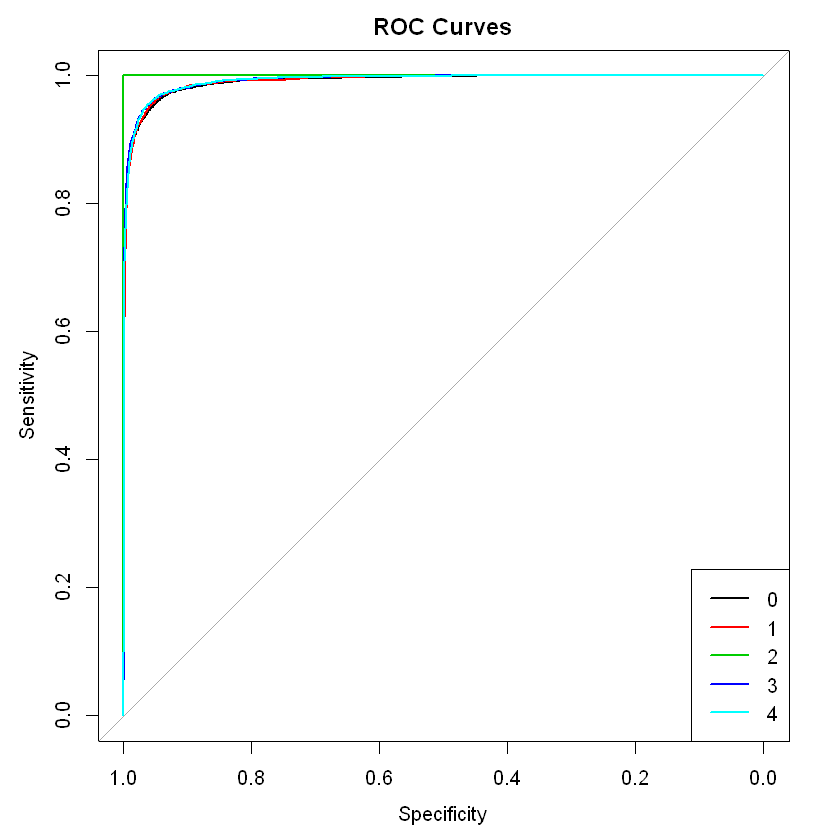

In [21]:
# 예측 확률 계산
pred_probs <- predict(fit_rf, newdata = test[,-92], type = "prob")

# 각 클래스에 대한 ROC 곡선 계산
roc_list <- lapply(levels(test$y), function(class) {
  roc(test$y == class, pred_probs[, class])
})

# ROC 곡선 그리기
plot(roc_list[[1]], col = 1, main = "ROC Curves")
for (i in 2:length(roc_list)) {
  plot(roc_list[[i]], add = TRUE, col = i)
}
legend("bottomright", legend = levels(test$y), col = 1:length(roc_list), lwd = 2)


# 모델 저장

In [22]:
saveRDS(fit_rf, file = "model_rf.rds")

In [23]:
list.files()

[1] "merged_data.csv"                                                    
[2] "model_rf.rds"                                                       
[3] "데이터 마이닝 프로젝트 - 머신러닝을 활용한 상수도관 누수 감지.ipynb"
[4] "상하수도 데이터(상수관로 누수 감지)"